<a href="https://colab.research.google.com/github/basithbahi/PCVK/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Nama:   Abdul Basith Bahi
    NIM:    2141720177
    Kelas:  3H

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, buat notebook baru dan beri nama“Week11.ipynb”. Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan cara sebagai berikut.

In [84]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

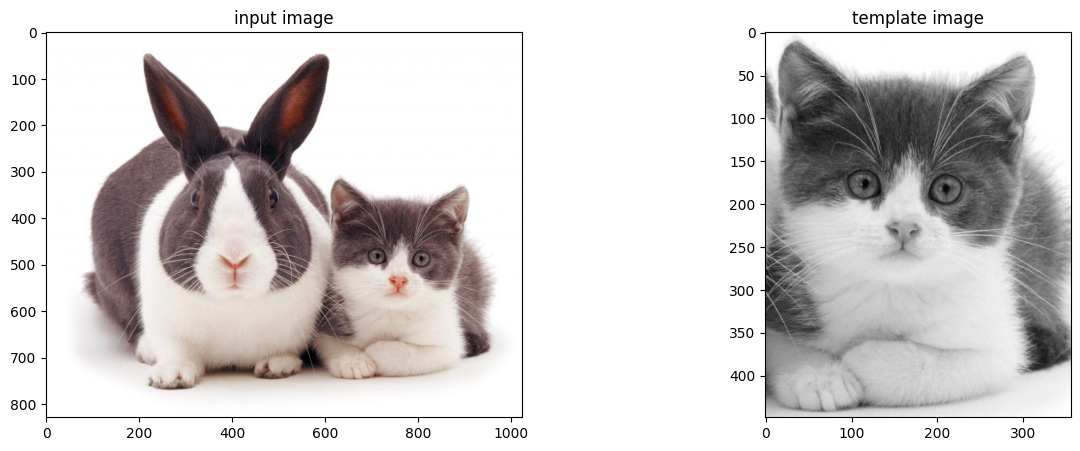

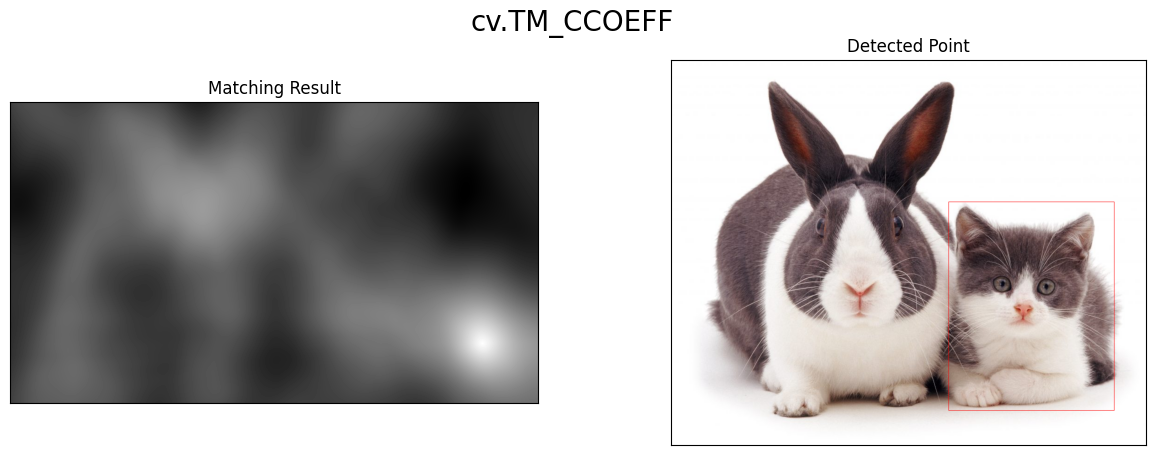

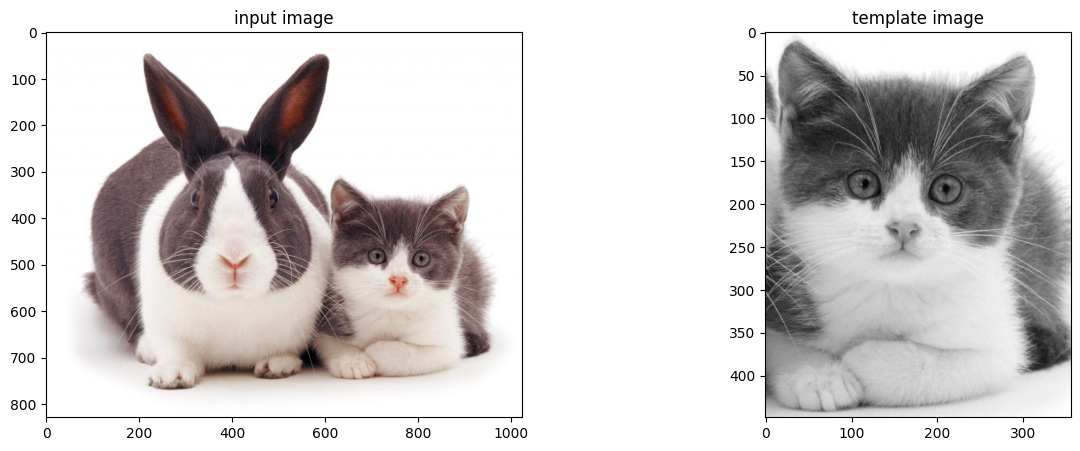

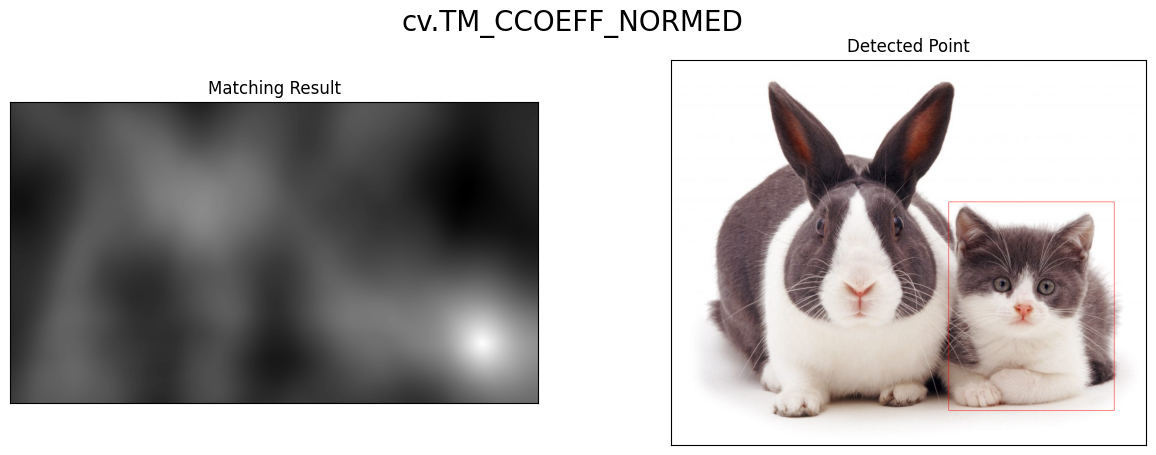

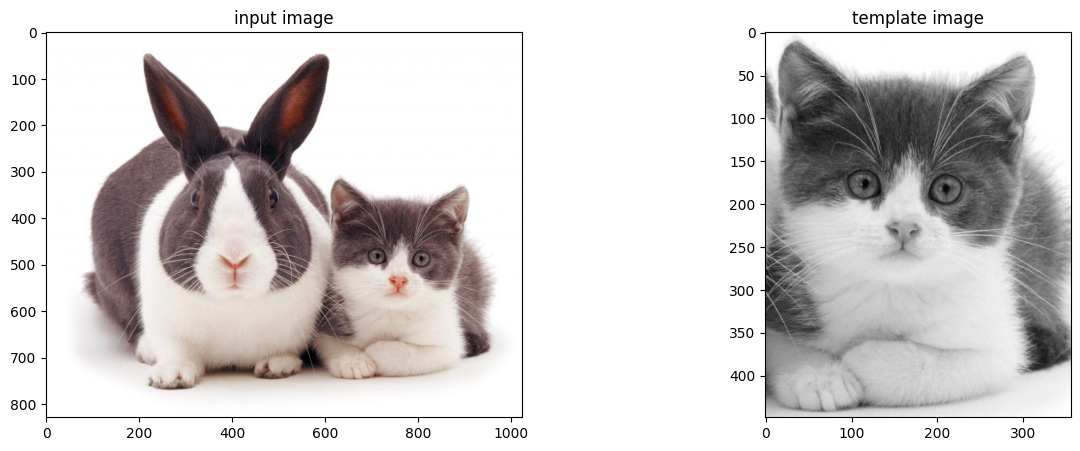

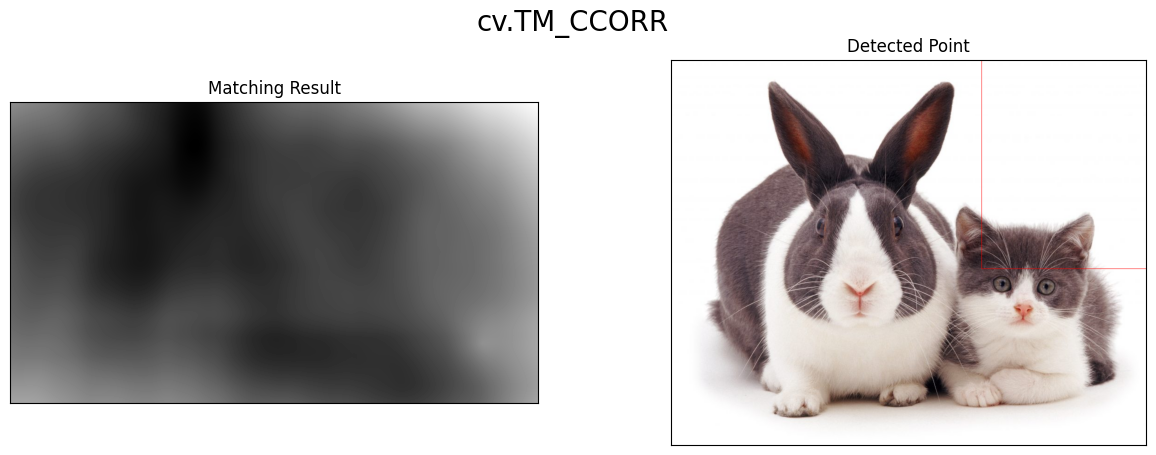

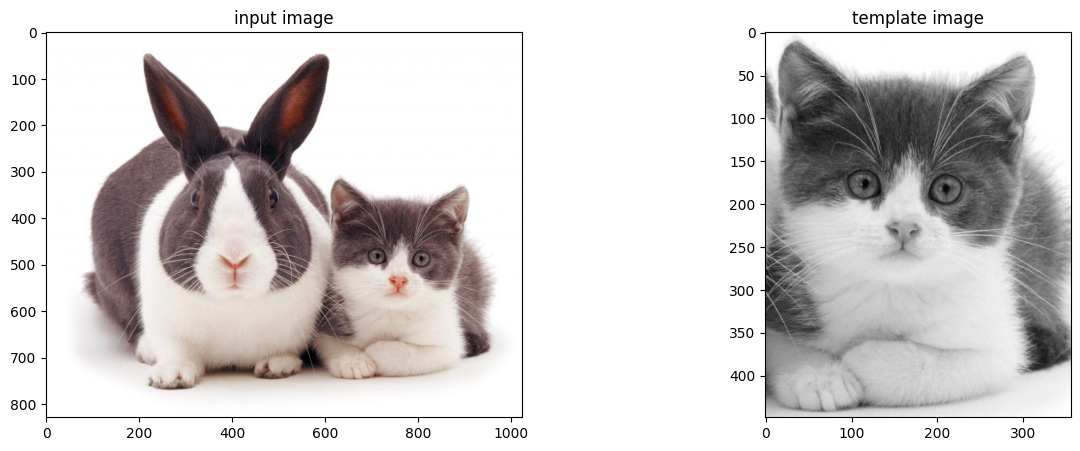

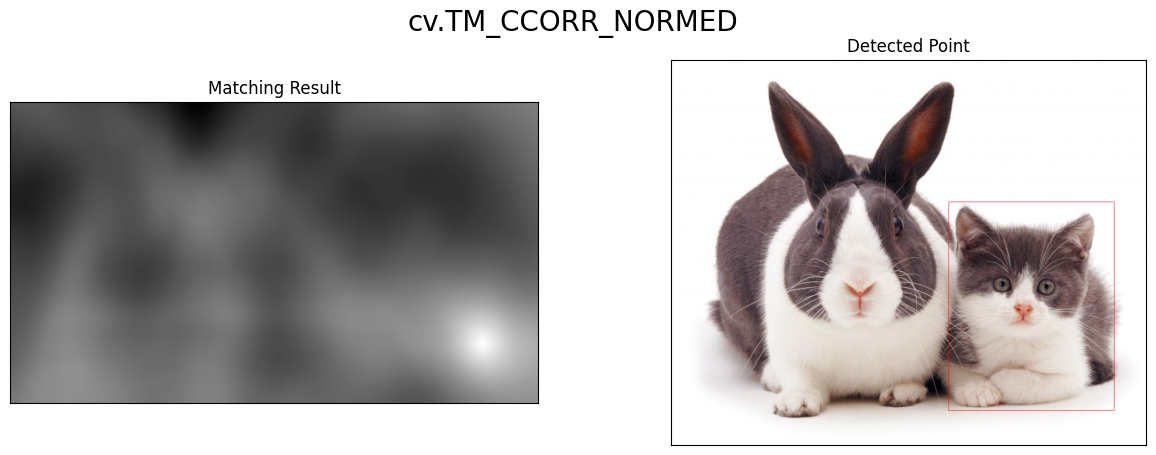

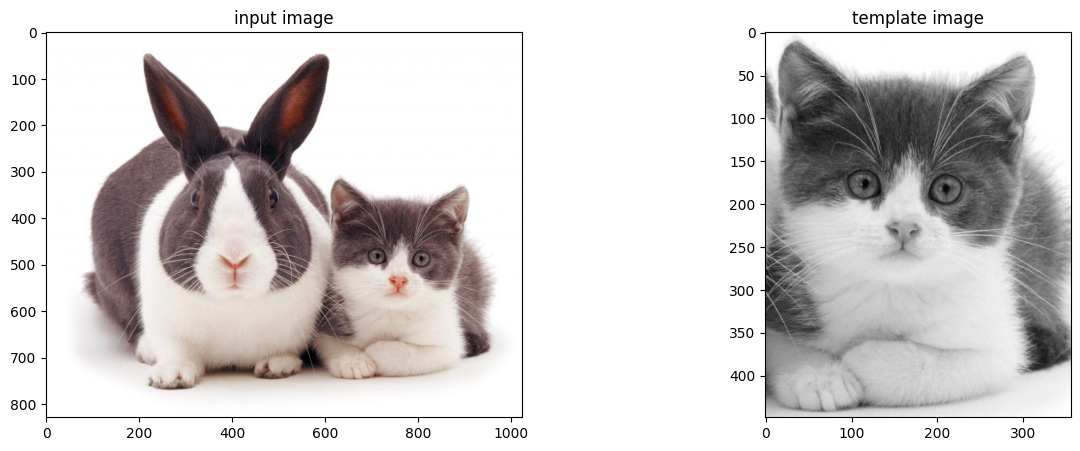

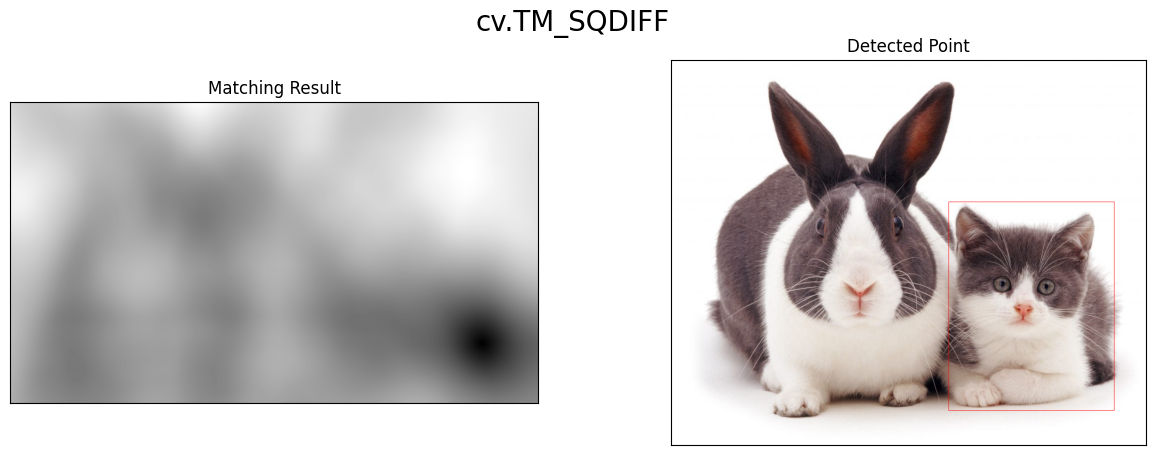

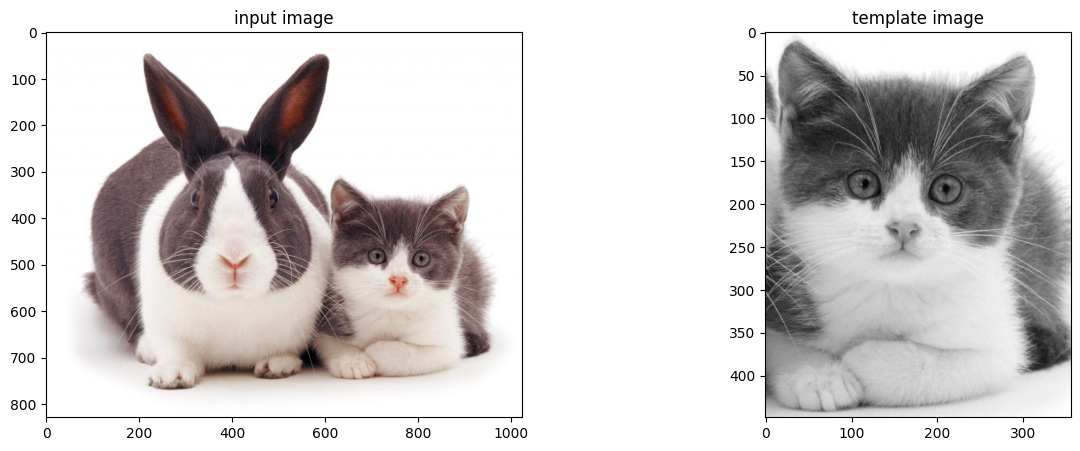

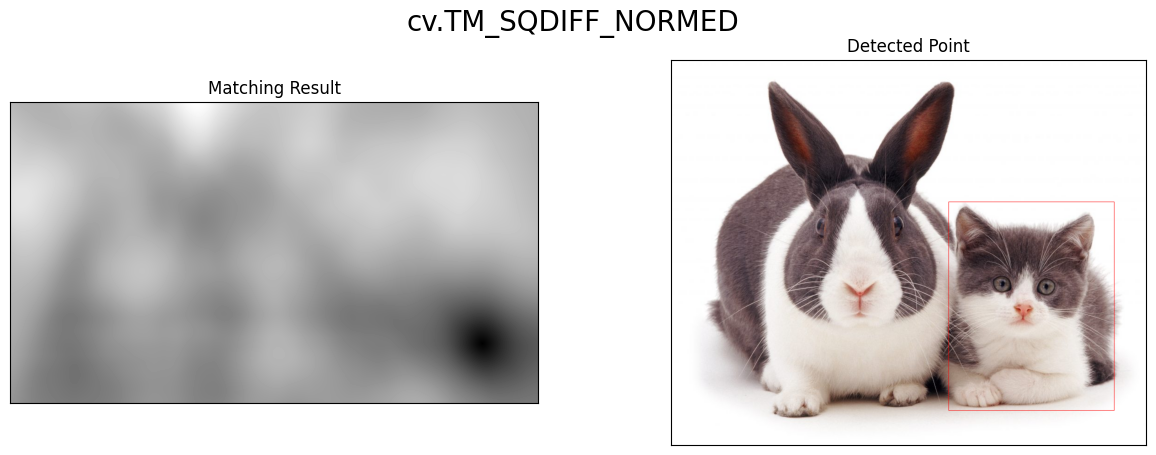

In [3]:
def template_matching(img, template, method):
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_copy = img.copy()
    w, h = template.shape[::-1]

     # print input image dan template
    f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
    axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
    axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

    res = cv.matchTemplate(img_gray, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)


    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img_copy, top_left, bottom_right, (0, 0, 255))

    return img_copy, res

img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/cats_and_bunnies.jpg')
template = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/cat2_templatejpg.jpg', 0)

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
           'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for method_str in methods:
    method = eval(method_str)
    result_img, result_res = template_matching(img, template, method)

    plt.figure(figsize=(15, 5))
    plt.subplot(121), plt.imshow(result_res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv.cvtColor(result_img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(method_str, fontsize=20)
    plt.show()

3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai berikut:

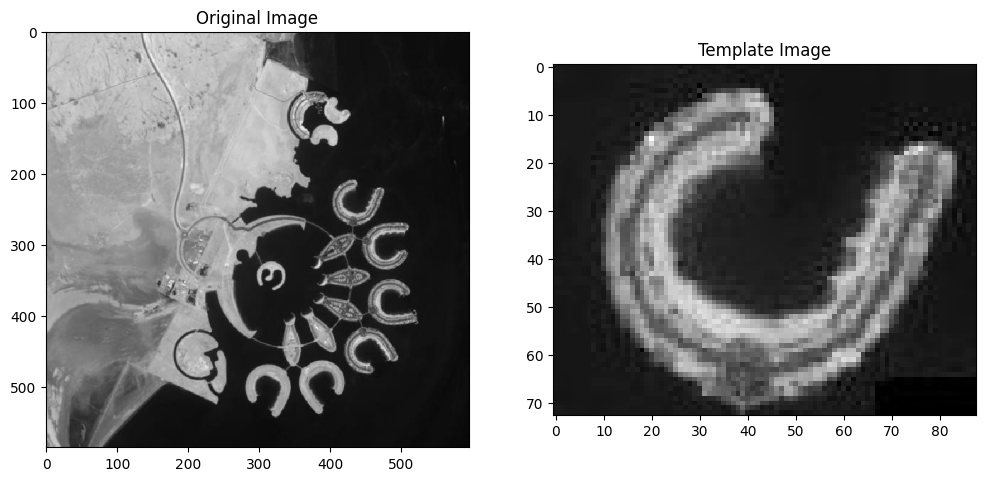

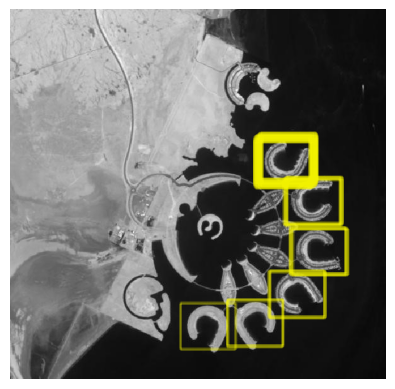

In [4]:
from skimage.feature import match_template

image = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain.jpg', 0)
template_image = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain-template.jpg', 0)

fig, axarr = plt.subplots(1, 2, figsize=(12, 8))
axarr[0].imshow(image, cmap='gray')
axarr[0].set_title("Original Image")
axarr[1].imshow(template_image, cmap='gray')
axarr[1].set_title("Template Image")

# Hitung kemiripan citra dengan citra template
result = match_template(image, template_image)

# Tentukan threshold untuk hasil match
threshold = 0.45
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
ax.set_axis_off()
height, width = template_image.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.1)
    ax.add_patch(rect)

plt.show()

4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga menghasilkan luaran sebagai berikut:

In [77]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/car-park.jpg')
image2 = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/chess-board.jpg')
image3 = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/chess-board.jpg')
image4 = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/sudoku.jpg')
image5 = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/laptop.jpg')

In [78]:
img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
img_gray2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
img_gray3 = cv.cvtColor(image3, cv.COLOR_BGR2GRAY)
img_gray4 = cv.cvtColor(image4, cv.COLOR_BGR2GRAY)
img_gray5 = cv.cvtColor(image5, cv.COLOR_BGR2GRAY)

In [61]:
# Sobel Edge Detection
img_car = cv.cvtColor(image, cv.COLOR_BGR2RGB)

sobel_x = cv.Sobel(img_gray, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(img_gray, cv.CV_64F, 0, 1, ksize=3)
sobel_combined = cv.magnitude(sobel_x, sobel_y)

In [60]:
# Canny Edge Detection
canny = cv.Canny(image, 100, 200)

In [59]:
# Laplacian Edge Detection
laplacian = cv.Laplacian(image, cv.CV_64F)
laplacian_abs = cv.convertScaleAbs(laplacian)

In [62]:
# Harris Corner Detection
dst = cv.cornerHarris(img_gray2, 3, 1, 0.04)
gray_img = np.float32(img_gray2)
harris_output = cv.cornerHarris(gray_img, 2, 3, 3)

# Hasil harris corner dilakukan dilasi untuk menandai sudut
harris_output = cv.dilate(harris_output, None)

# Threshold untuk mengoptimalkan nilai
image2[dst > 0.01 * dst.max()] = [0, 0, 255]

In [65]:
# Shi-Tomasi Detection
gray_img3 = np.float32(img_gray3)  # Corrected here
corners = cv.goodFeaturesToTrack(gray_img3, maxCorners=100, qualityLevel=0.01, minDistance=10)

# Konversi koordinat sudut menjadi integer
corners = np.int0(corners)

# Tandai sudut dengan warna kuning
for corner in corners:
    x, y = corner.ravel()
    cv.circle(image3, (x, y), 5, (0, 255, 255), -1)

In [74]:
# Deteksi tepi dengan Canny
edges = cv.Canny(img_gray4, 90, 150, apertureSize=3)

# Operasi dilasi
kernel = np.ones((3, 3), np.uint8)
edges = cv.dilate(edges, kernel, iterations=1)

# Operasi erosi
kernel = np.ones((5, 5), np.uint8)
edges = cv.erode(edges, kernel, iterations=1)

# Deteksi garis dengan Hough Line Transform
lines = cv.HoughLines(edges, 1, np.pi / 180, 150)

if not lines is None and len(lines) > 0:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv.line(image4, (x1, y1), (x2, y2), (0, 0, 255), 2)

In [79]:
# Contour detection
edged = cv.Canny(img_gray5, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cv.drawContours(image5, contours, -1, (0,0,255), 3)

array([[[199, 214, 162],
        [199, 214, 162],
        [199, 214, 162],
        ...,
        [200, 198, 178],
        [200, 198, 178],
        [200, 198, 178]],

       [[199, 214, 162],
        [199, 214, 162],
        [199, 214, 162],
        ...,
        [200, 198, 178],
        [200, 198, 178],
        [200, 198, 178]],

       [[199, 214, 162],
        [199, 214, 162],
        [199, 214, 162],
        ...,
        [200, 198, 178],
        [200, 198, 178],
        [200, 198, 178]],

       ...,

       [[ 38,  33,  61],
        [ 38,  33,  61],
        [ 38,  33,  61],
        ...,
        [ 81,  78,  81],
        [ 81,  78,  81],
        [ 81,  78,  81]],

       [[ 38,  33,  61],
        [ 38,  33,  61],
        [ 38,  33,  61],
        ...,
        [ 81,  78,  81],
        [ 81,  78,  81],
        [ 81,  78,  81]],

       [[ 38,  33,  61],
        [ 38,  33,  61],
        [ 38,  33,  61],
        ...,
        [ 81,  78,  81],
        [ 81,  78,  81],
        [ 81,  78,  81]]

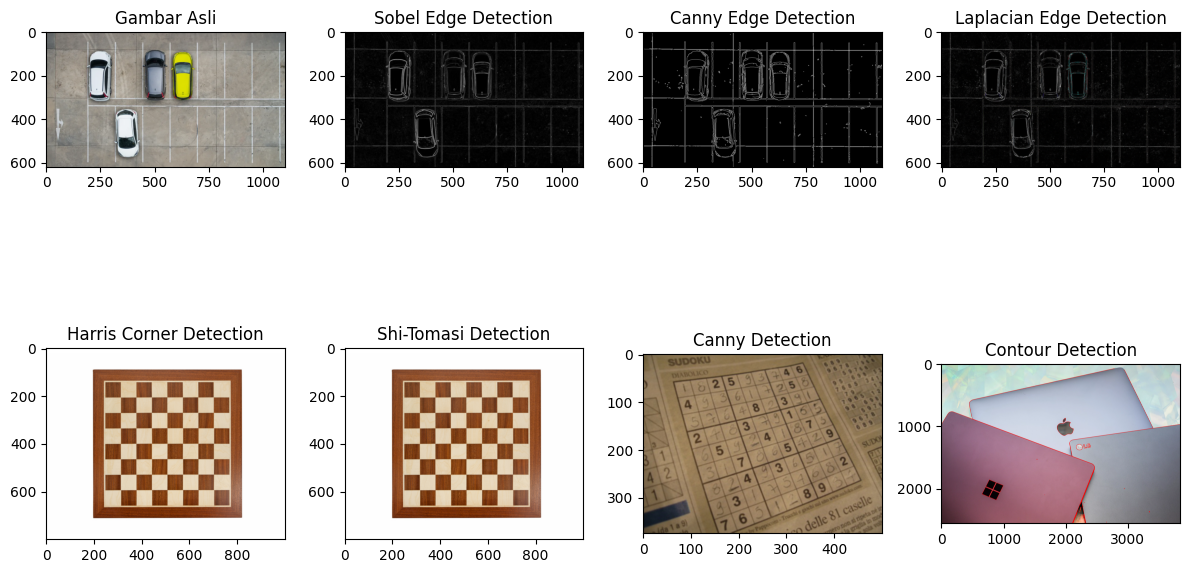

In [81]:
# Plotting
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 4, 1)
plt.imshow(img_car, cmap='gray')
plt.title('Gambar Asli')

# Sobel Edge Detection
plt.subplot(2, 4, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')

# Canny Edge Detection
plt.subplot(2, 4, 3)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection')

# Laplacian Edge Detection
plt.subplot(2, 4, 4)
plt.imshow(laplacian_abs, cmap='gray')
plt.title('Laplacian Edge Detection')

# Harris Corner Detection
plt.subplot(2, 4, 5)
plt.imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')

# Shi-Tomasi Detection
plt.subplot(2, 4, 6)
plt.imshow(cv.cvtColor(image3, cv.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Detection')

# Canny Detection
plt.subplot(2, 4, 7)
plt.imshow(cv.cvtColor(image4, cv.COLOR_BGR2RGB))
plt.title('Canny Detection')

# Contour Detection
plt.subplot(2, 4, 8)
plt.imshow(cv.cvtColor(image5, cv.COLOR_BGR2RGB))
plt.title('Contour Detection')

plt.tight_layout()
plt.show()

# **TUGAS**

Muat 2 library berikut sebagai tahapan persiapan

In [92]:
import cv2
import os

Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut

In [100]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK/Images/KTP"

# Nama file yang ingin di proses
name_file = "ktp3.png"

# Looping file di direktori
if name_file in os.listdir(path_plate):
    image_path = os.path.join(path_plate, name_file)
    src = cv2.imread(os.path.join(path_plate, name_file))
    blurred = src.copy()
    gray = blurred.copy()

Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi

In [101]:
# Filtering
for i in range(10):
    blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra (thresholding)

168.0 (300, 493)


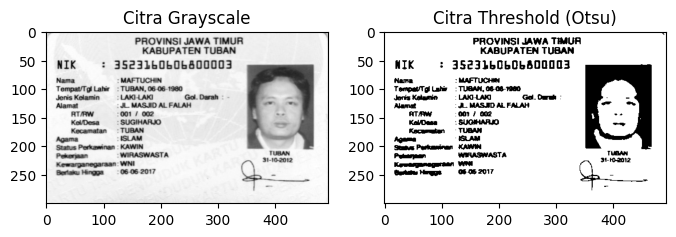

In [102]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)
print(ret, bw.shape)

plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.title('Citra Grayscale')

plt.subplot(122)
plt.imshow(bw, cmap='gray')
plt.title('Citra Threshold (Otsu)')

plt.show()

Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.

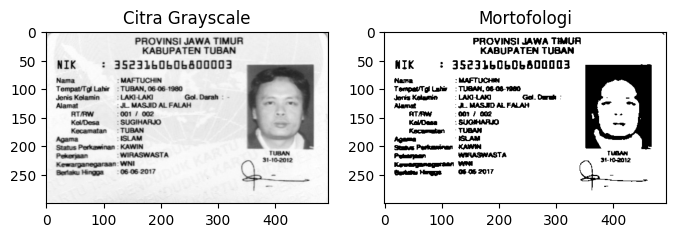

In [103]:
erode = cv.erode(bw.copy(),
cv.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.title('Citra Grayscale')

plt.subplot(122)
plt.imshow(bw, cmap='gray')
plt.title('Mortofologi')

plt.show()

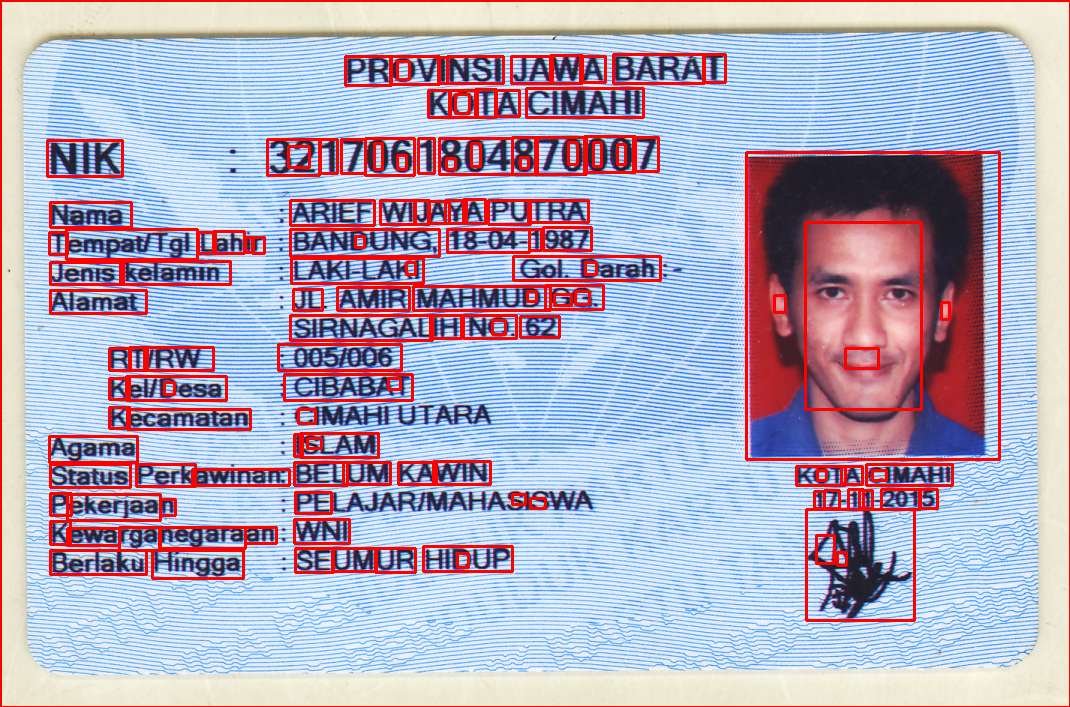

In [104]:
from google.colab.patches import cv2_imshow

ktp = cv.imread("/content/drive/MyDrive/PCVK/Images/KTP/ktp2.png")

blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 7 and float(ras) <= 7:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 12 and w >= 7 and float(ras) <= 8:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

cv2_imshow(ktp)